<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/KATHIMERINI_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [271]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [272]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [273]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [274]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [275]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [276]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 52.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [277]:
import spacy

In [278]:
nlp = spacy.load('el_core_news_sm')

In [279]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [280]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_Kathimerini_Airbnb.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [281]:
airbnb_df

article_url  \
0    https://www.kathimerini.gr/society/563664565/t...   
1    https://www.kathimerini.gr/economy/563662750/p...   
2    https://www.kathimerini.gr/economy/563646130/t...   
3    https://www.kathimerini.gr/economy/563642167/x...   
4    https://www.kathimerini.gr/world/563620822/isp...   
..                                                 ...   
175  https://www.kathimerini.gr/world/561379993/air...   
176  https://www.kathimerini.gr/economy/561356899/s...   
177  https://www.kathimerini.gr/economy/561355834/s...   
178  https://www.kathimerini.gr/economy/561346735/a...   
179  https://www.kathimerini.gr/society/561346009/t...   

                                                 title        date      time  \
0    Θεσσαλονίκη: Νοίκιασε διαμέρισμα Airbnb και έκ...  2025-06-16  09:34:49   
1           «Παγώνει» και το 2026 το Airbnb στην Αθήνα  2025-06-16  07:34:43   
2                                                  NaN         NaN       NaN   
3                Ξεπέρασαν το 1 εκατ. οι κλίνες Airbnb  2025-05-31  09:06:00   
4    Ισπανία: Εντολή στην Airbnb να σβήσει 65.000 α...  2025-05-19  23:40:00   
..                                                 ...         ...       ...   
175  Airbnb: Απαγόρευση των πάρτι και αυτό το καλοκ...  2021-05-28  16:03:59   
176  Σε ποιες γειτονιές της Αθήνας βυθίστηκε η Airb...  2021-05-10  19:00:44   
177        Στην Airbnb μόνο με αριθμό μητρώου ακινήτου  2021-05-09  08:46:23   
178  Αποκλειστικό «Κ»: Φρένο στα αδήλωτα Airbnb – Τ...  2021-04-28  09:11:43   
179  Το «Πάσχα στην πόλη» γεμίζει ξενοδοχεία και ai...  2021-04-27  14:55:32   

       section                  author  \
0     Κοινωνία                Newsroom   
1    Οικονομία  Προκόπης Χατζηνικολάου   
2          NaN                     NaN   
3    Οικονομία                  Δήκτης   
4       Κόσμος                Newsroom   
..         ...                     ...   
175     Κόσμος                Newsroom   
176  Οικονομία       Νίκος Ρουσάνογλου   
177  Οικονομία  Προκόπης Χατζηνικολάου   
178  Οικονομία  Προκόπης Χατζηνικολάου   
179   Κοινωνία                Newsroom   

                                               excerpt  \
0                 Οι Αρχές προχώρησαν σε δύο συλλήψεις   
1    Δεν θα δοθούν νέες άδειες βραχυχρόνιας μίσθωση...   
2                                                  NaN   
3                                                  NaN   
4    Σύμφωνα με την κυβέρνηση, πολλές καταχωρήσεις ...   
..                                                 ...   
175  Πέρυσι τον Αύγουστο, η εταιρεία προέβη σε παγκ...   
176                                                NaN   
177                                                NaN   
178                                                NaN   
179                                                NaN   

                                             text_body  \
0    Συνελήφθησαν χτες Κυριακή, δύο άτομα, μετά τον...   
1    Η στεγαστική κρίση αποτελεί ένα από τα σημαντι...   
2    Του Ηλία Μπέλλου Ξεκίνησε στα τέλη της δεκαετί...   
3    Το δεύτερο τρίμηνο του 2025 ξεκίνησε με ισχυρή...   
4    Η κυβέρνηση της Ισπανίας έδωσε εντολή στην Air...   
..                                                 ...   
175  Η εταιρεία Airbnb δήλωσε την Πέμπτη ότι θα παρ...   
176  Εμφανής είναι η πτώση της απήχησης των βραχυχρ...   
177  Μήνυμα στους Ελληνες ιδιοκτήτες και διαχειριστ...   
178  Σφίγγει ο κλοιός για τους ιδιοκτήτες ακινήτων ...   
179  Σημαντικά αυξημένο αριθμό πελατών θα δουν τις ...   

                                         feat_img_link  \
0    https://www.kathimerini.gr/wp-content/uploads/...   
1    https://www.kathimerini.gr/wp-content/uploads/...   
2                                                  NaN   
3    https://www.kathimerini.gr/wp-content/uploads/...   
4    https://www.kathimerini.gr/wp-content/uploads/...   
..                                                 ...   
175  https://www.kathimerini.gr/wp-content/uploads/...   
176  https://www.kathi

In [282]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(164, 10)

In [283]:
airbnb_df.tail(20)

article_url  \
144  https://www.kathimerini.gr/economy/561732340/x...   
145  https://www.kathimerini.gr/economy/561730699/a...   
146  https://www.kathimerini.gr/economy/561724801/m...   
147  https://www.kathimerini.gr/economy/561692506/a...   
148  https://www.kathimerini.gr/economy/561671320/a...   
149  https://www.kathimerini.gr/world/561635266/sfi...   
150  https://www.kathimerini.gr/economy/561611524/m...   
151  https://www.kathimerini.gr/world/561607582/hou...   
152  https://www.kathimerini.gr/economy/internation...   
153  https://www.kathimerini.gr/economy/561553726/a...   
154  https://www.kathimerini.gr/economy/561549928/y...   
155  https://www.kathimerini.gr/economy/561521854/y...   
156  https://www.kathimerini.gr/economy/561500824/o...   
157  https://www.kathimerini.gr/economy/561444517/a...   
158  https://www.kathimerini.gr/economy/561380923/e...   
159  https://www.kathimerini.gr/world/561379993/air...   
160  https://www.kathimerini.gr/economy/561356899/s...   
161  https://www.kathimerini.gr/economy/561355834/s...   
162  https://www.kathimerini.gr/economy/561346735/a...   
163  https://www.kathimerini.gr/society/561346009/t...   

                                                 title        date      time  \
144                              Ξενοδόχοι κατά Airbnb  2022-02-23  21:30:29   
145        Αύξηση κρατήσεων και μικρά κέρδη για Airbnb  2022-02-22  11:16:00   
146  Μισθώσεις τύπου Airbnb: Επανέρχονται οι προσδο...  2022-02-19  08:48:14   
147                Ανάκαμψη των μισθώσεων τύπου Airbnb  2022-01-30  08:45:43   
148        Αυξάνεται η ζήτηση για γραφεία τύπου Airbnb  2022-01-20  07:30:00   
149               Σφίγγει ο κλοιός γύρω από την Airbnb  2021-12-19  14:11:19   
150          Μισθώσεις Airbnb: Μέρες 2019 τον Οκτώβριο  2021-12-02  22:41:38   
151  House of Gucci: Στο Airbnb η βίλα από την ταιν...  2021-11-29  17:38:17   
152  O δήμος της Νέας Υόρκης κατά της «βασίλισσας» ...  2021-11-05  20:39:54   
153  Απογείωση Airbnb και ενοικίων στο παραλιακό μέ...  2021-10-25  16:50:24   
154  Υπέρ των μισθώσεων τύπου Airbnb τάσσονται οι Ε...  2021-10-21  23:33:21   
155  Υψηλότερες επιδόσεις σε σχέση με τα ξενοδοχεία...  2021-10-02  22:25:39   
156  Οι τουρίστες επέστρεψαν στην Αθήνα, οι ιδιοκτή...  2021-09-16  12:27:00   
157  Airbnb: Μέρες του 2019 ζει η πλατφόρμα στα δημ...  2021-07-27  18:36:32   
158  Εκτινάχθηκαν οι κρατήσεις μέσω Airbnb – Στην Ε...  2021-06-01  19:04:09   
159  Airbnb: Απαγόρευση των πάρτι και αυτό το καλοκ...  2021-05-28  16:03:59   
160  Σε ποιες γειτονιές της Αθήνας βυθίστηκε η Airb...  2021-05-10  19:00:44   
161        Στην Airbnb μόνο με αριθμό μητρώου ακινήτου  2021-05-09  08:46:23   
162  Αποκλειστικό «Κ»: Φρένο στα αδήλωτα Airbnb – Τ...  2021-04-28  09:11:43   
163  Το «Πάσχα στην πόλη» γεμίζει ξενοδοχεία και ai...  2021-04-27  14:55:32   

                section                  author  \
144           Οικονομία           Ηλίας Μπέλλος   
145           Οικονομία                Newsroom   
146           Οικονομία       Νίκος Ρουσάνογλου   
147           Οικονομία       Νίκος Ρουσάνογλου   
148           Οικονομία       Νίκος Ρουσάνογλου   
149              Κόσμος                 REUTERS   
150           Οικονομία       Νίκος Ρουσάνογλου   
151              Κόσμος                Newsroom   
152   Διεθνής Οικονομία                Newsroom   
153           Οικονομία       Νίκος Ρουσάνογλου   
154           Οικονομία       Νίκος Ρουσάνογλου   
155           Οικονομία       Νίκος Ρουσάνογλου   
156           Οικονομία       Νίκος Ρουσάνογλου   
157  Ελληνική Οικονομία       Νίκος Ρουσάνογλου   
158           Οικονομία       Νίκος Ρουσάνογλου   
159              Κόσμος                Newsroom   
160           Οικονομία       Νίκος Ρουσάνογλου   
161           Οικονομία  Προκόπης Χατζηνικολάου   
162           Οικονομία  Προκόπης Χατζηνικολάου   
163            Κοινωνία                Newsroom   

                                               excerpt  \
144  Επιχειρη

In [284]:
len(airbnb_df)

164

In [285]:
airbnb_df = airbnb_df.iloc[:-15]

In [286]:
airbnb_df.to_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_Kathimerini_Airbnb.csv", index=False)

In [287]:
airbnb_df.tail(10)

article_url  \
139  https://www.kathimerini.gr/economy/561783001/a...   
140  https://www.kathimerini.gr/economy/561770398/t...   
141  https://www.kathimerini.gr/economy/561759412/x...   
142  https://www.kathimerini.gr/society/561754936/p...   
143  https://www.kathimerini.gr/economy/561734089/a...   
144  https://www.kathimerini.gr/economy/561732340/x...   
145  https://www.kathimerini.gr/economy/561730699/a...   
146  https://www.kathimerini.gr/economy/561724801/m...   
147  https://www.kathimerini.gr/economy/561692506/a...   
148  https://www.kathimerini.gr/economy/561671320/a...   

                                                 title        date      time  \
139  Airbnb: Έκρηξη κρατήσεων στην Ελλάδα για το κα...  2022-03-29  07:57:38   
140     Τζίρος μισό δισ. στα «ξενοδοχεία» τύπου Airbnb  2022-03-22  07:35:00   
141      Ξεκινάει πόλεμος με «ξενοδοχεία» τύπου Airbnb  2022-03-14  09:03:25   
142  Πόλεμος στην Ουκρανία: Εικονικές κρατήσεις Air...  2022-03-10  20:44:46   
143          Airbnb: Από τις πιο φθηνές πόλεις η Αθήνα  2022-02-24  15:50:09   
144                              Ξενοδόχοι κατά Airbnb  2022-02-23  21:30:29   
145        Αύξηση κρατήσεων και μικρά κέρδη για Airbnb  2022-02-22  11:16:00   
146  Μισθώσεις τύπου Airbnb: Επανέρχονται οι προσδο...  2022-02-19  08:48:14   
147                Ανάκαμψη των μισθώσεων τύπου Airbnb  2022-01-30  08:45:43   
148        Αυξάνεται η ζήτηση για γραφεία τύπου Airbnb  2022-01-20  07:30:00   

       section               author  \
139  Οικονομία    Νίκος Ρουσάνογλου   
140  Οικονομία        Ηλίας Μπέλλος   
141  Οικονομία        Ηλίας Μπέλλος   
142   Κοινωνία       Ιωάννα Φωτιάδη   
143  Οικονομία  Δημήτρης Δελεβέγκος   
144  Οικονομία        Ηλίας Μπέλλος   
145  Οικονομία             Newsroom   
146  Οικονομία    Νίκος Ρουσάνογλου   
147  Οικονομία    Νίκος Ρουσάνογλου   
148  Οικονομία    Νίκος Ρουσάνογλου   

                                               excerpt  \
139  Με τον υψηλότερο ρυθμό στην Ευρώπη, 232% σε σύ...   
140  Ζήτημα αθέμιτου ανταγωνισμού θέτει ο ΣΕΤΕ – Β....   
141  Ετοιμάζονται προσφυγές από τους ξενοδόχους – Γ...   
142  Μέσω της Airbnb, χιλιάδες ταξιδιώτες κλείνουν ...   
143  Καταλαμβάνει τη 2η θέση με κριτήριο την εγγύτη...   
144  Επιχειρηματίες χρησιμοποιούν πολυκατοικίες για...   
145  Στροφή στις μακροχρόνιες μισθώσεις από την πλα...   
146  Τα καταλύματα είναι κατά 12% λιγότερα σε σχέση...   
147  Οι διανυκτερεύσεις στην Ελλάδα αυξήθηκαν κατά ...   
148  Τα επόμενα χρόνια προβλέπεται διπλασιασμός του...   

                                             text_body  \
139  Με τον ταχύτερο ρυθμό στην Ευρώπη αυξάνονται ο...   
140  Δραστηριότητα με οικονομικό αντικείμενο, που π...   
141  Ως αθέμιτο ανταγωνισμό που έχει λάβει ανεξέλεγ...   
142  Στην αρχή ήταν μια ιδέα που διατυπώθηκε φωναχτ...   
143  Τη δεύτερη φθηνότερη πόλη στην Ευρώπη αποτελεί...   
144  Προσφυγή στην Ελληνική Επιτροπή Ανταγωνισμού κ...   
145  Τον Ιανουάριο, ο ιδρυτής της αμερικανικής πλατ...   
146  Συνολικά 73.232 καταλύματα βραχυχρόνιας μίσθωσ...   
147  Σε ηγέτιδα δύναμη της ανάκαμψης της ζήτησης γι...   
148  Ιδανική φαντάζει η τρέχουσα συγκυρία για την ε...   

                                         feat_img_link  \
139  https://www.kathimerini.gr/wp-content/uploads/...   
140  https://www.kathimerini.gr/wp-content/uploads/...   
141  https://www.kathimerini.gr/wp-content/uploads/...   
142  https://www.kathimerini.gr/wp-content/uploads/...   
143  https://www.kathimerini.gr/wp-content/uploads/...   
144  https://www.kathimerini.gr/wp-content/uploads/...   
145  https://www.kathimerini.gr/wp-content/uploads/...   
146  https://www.kathimerini.gr/wp-content/uploads/...   
147  https://www.kathimerini.gr/wp-content/uploads/...   
148  https://www.kathimerini.gr/wp-content/uploads/...   

                                       feat_img_cation  
139  Τη μεγαλύτερη αύξηση, με 552%, σε σχέση με πέρ...  
140  Μελέτη της Grant Thornton προσδιορίζει το μερί...  
141  

In [288]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [289]:
short_airbnb_df.tail()

date                                               text
144  2022-02-23  Προσφυγή στην Ελληνική Επιτροπή Ανταγωνισμού κ...
145  2022-02-22  Τον Ιανουάριο, ο ιδρυτής της αμερικανικής πλατ...
146  2022-02-19  Συνολικά 73.232 καταλύματα βραχυχρόνιας μίσθωσ...
147  2022-01-30  Σε ηγέτιδα δύναμη της ανάκαμψης της ζήτησης γι...
148  2022-01-20  Ιδανική φαντάζει η τρέχουσα συγκυρία για την ε...

In [290]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [291]:
# import spacy

# # Φόρτωσε το ελληνικό μοντέλο
# nlp = spacy.load("el_core_news_sm")

# # Συνάρτηση για lemmatization
# def lemmatize_text(text):
#     doc = nlp(text)
#     return ' '.join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# # Εφάρμοσε σε όλο το dataframe
# short_airbnb_df['text'] = short_airbnb_df['text'].apply(lemmatize_text)

# # short_airbnb_df['lemmatized_text'] = short_airbnb_df['text'].apply(lemmatize_text)
# # short_airbnb_df['text'] = short_airbnb_df['lemmatized_text']
# # short_airbnb_df.drop(columns=['lemmatized_text'], inplace=True)

In [292]:
short_airbnb_df

date                                               text
0    2025-06-16  Συνελήφθησαν χτες Κυριακή, δύο άτομα, μετά τον...
1    2025-06-16  Η στεγαστική κρίση αποτελεί ένα από τα σημαντι...
2    2025-05-31  Το δεύτερο τρίμηνο του 2025 ξεκίνησε με ισχυρή...
3    2025-05-19  Η κυβέρνηση της Ισπανίας έδωσε εντολή στην Air...
4    2025-05-21  Eίναι φίλος με τον Μπαράκ Ομπάμα, τον Αρνολντ ...
..          ...                                                ...
144  2022-02-23  Προσφυγή στην Ελληνική Επιτροπή Ανταγωνισμού κ...
145  2022-02-22  Τον Ιανουάριο, ο ιδρυτής της αμερικανικής πλατ...
146  2022-02-19  Συνολικά 73.232 καταλύματα βραχυχρόνιας μίσθωσ...
147  2022-01-30  Σε ηγέτιδα δύναμη της ανάκαμψης της ζήτησης γι...
148  2022-01-20  Ιδανική φαντάζει η τρέχουσα συγκυρία για την ε...

[149 rows x 2 columns]

In [293]:
print("Πριν λεμματοποίηση:")
print(short_airbnb_df['text'].head())

Πριν λεμματοποίηση:
0    Συνελήφθησαν χτες Κυριακή, δύο άτομα, μετά τον...
1    Η στεγαστική κρίση αποτελεί ένα από τα σημαντι...
2    Το δεύτερο τρίμηνο του 2025 ξεκίνησε με ισχυρή...
3    Η κυβέρνηση της Ισπανίας έδωσε εντολή στην Air...
4    Eίναι φίλος με τον Μπαράκ Ομπάμα, τον Αρνολντ ...
Name: text, dtype: object


In [294]:
short_airbnb_df['text_lemmatized'] = short_airbnb_df['text'].apply(lemmatize_text)
short_airbnb_df['text'] = short_airbnb_df['text_lemmatized']
short_airbnb_df.drop(columns=['text_lemmatized'], inplace=True)

In [295]:
print("Μετά λεμματοποίηση:")
print(short_airbnb_df['text'].head())

Μετά λεμματοποίηση:
0    συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...
1    στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...
2    δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...
3    κυβέρνηση ισπανία δίνω εντολή airbnb αποσύρω π...
4    eίναι φίλος μπαράκ ομπάμα αρνολντ σβαρτσενέγκε...
Name: text, dtype: object


In [296]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [297]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     1      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

Top bigrams:
βραχυχρόνιος μίσθωση       251
βραχυχρόνιος μισθώση       176
βραχυχρόνια μίσθωση        158
βραχυχρόνιος μισθώσεις     145
000 ευρώ                    80
καταλύμα βραχυχρόνιος       60
μέσος τιμή                  58
κέντρο αθήνα                56
εκατ ευρώ                   53
δισ ευρώ                    50
σύμφωνα στοιχείο            49
φυσικά πρόσωπος             44
τιμή διανυκτέρευση          37
μακροχρόνια μίσθωση         31
καταλυμάτων βραχυχρόνια     30
dtype: int64


/tmp/ipython-input-298-2292567472.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')


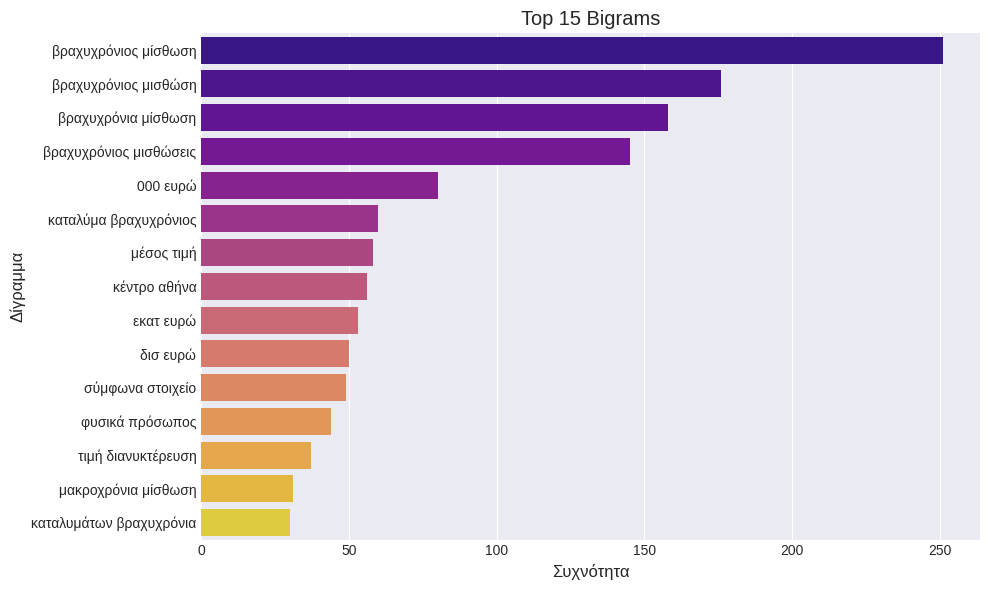

In [298]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load("el_core_news_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# Λεμματοποίηση
short_airbnb_df['text'] = short_airbnb_df['text'].apply(lemmatize_text)

# Stopwords πεζά
stopwords_list = [w.lower() for w in nlp.Defaults.stop_words]

# CountVectorizer bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords_list)
bigram_matrix = bigram_vectorizer.fit_transform(short_airbnb_df['text'])

bigram_freq = pd.Series(bigram_matrix.toarray().sum(axis=0),
                        index=bigram_vectorizer.get_feature_names_out()).sort_values(ascending=False).head(15)

print("Top bigrams:")
print(bigram_freq)

# Διάγραμμα
plt.figure(figsize=(10,6))
sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')
plt.title("Top 15 Bigrams")
plt.xlabel("Συχνότητα")
plt.ylabel("Δίγραμμα")
plt.tight_layout()
plt.show()


/tmp/ipython-input-299-1925883420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')


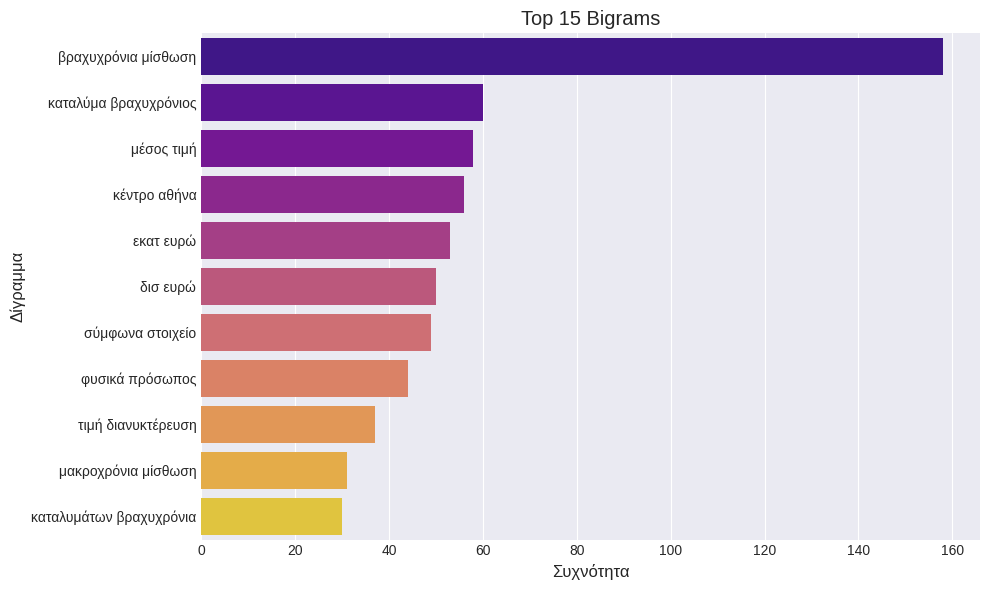

In [299]:
bigram_freq = bigram_freq.drop(['βραχυχρόνιος μίσθωση', 'βραχυχρόνιος μισθώση', 'βραχυχρόνιος μισθώσεις' , '000 ευρώ'], errors='ignore')
plt.figure(figsize=(10,6))
sns.barplot(x=bigram_freq.values, y=bigram_freq.index, palette='plasma')
plt.title("Top 15 Bigrams")
plt.xlabel("Συχνότητα")
plt.ylabel("Δίγραμμα")
plt.tight_layout()
plt.show()


In [300]:
wordcount_df.shape

(149, 13161)

In [301]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [302]:
wordcount_df[trust_words].sum(axis=1).head(3)

0    11
1    46
2    17
dtype: int64

In [303]:
short_airbnb_df.head(3)

date                                               text
0  2025-06-16  συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...
1  2025-06-16  στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...
2  2025-05-31  δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...

In [304]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [305]:
short_airbnb_df

date                                               text  anger  \
0    2025-06-16  συνελήφθησαν χτης κυριακή δύο άτομο εντοπισμός...      6   
1    2025-06-16  στεγαστικός κρίση αποτελώ σημαντικότερα πρόβλη...      6   
2    2025-05-31  δεύτερος τρίμηνος 2025 ξεκινώ ισχυρής άνοδος α...      6   
3    2025-05-19  κυβέρνηση ισπανία δίνω εντολή airbnb αποσύρω π...      2   
4    2025-05-21  eίμαι φίλος μπαράκ ομπάμα αρνολντ σβαρτσενέγκε...      3   
..          ...                                                ...    ...   
144  2022-02-23  προσφυγή ελληνικός επιτροπή ανταγωνισμός επιχε...      6   
145  2022-02-22  ιανουάριο ιδρυτής αμερικανικής πλατφόρμας διασ...      4   
146  2022-02-19  συνολικά 73.232 καταλύμα βραχυχρόνια μίσθωση λ...      8   
147  2022-01-30  ηγέτιδα δύναμη ανάκαμψη ζήτηση βραχυχρόνιος μι...     12   
148  2022-01-20  ιδανικός φαντάζω τρέχων συγκυρία επιτάχυνση δι...     10   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0          18    7        4         8     11            11        6        17   
1          60   18        0        11     46            18        8        31   
2          35    5        5         9     17            11        6        14   
3          20    5        1         1     15             2        2         5   
4          58   15        3        11     24            19        4        12   
..        ...  ...      ...       ...    ...           ...      ...       ...   
144        24    1        1         2     16             4        4        17   
145        32    4        1        11     18            11        7        17   
146        39    8        3         7     25             9       12        16   
147        33   12        1         8     23            10        8        18   
148        95   24        4        22     48            40        7        18   

     fear  
0      16  
1      19  
2      12  
3       5  
4       9  
..    ...  
144     8  
145    12  
146    11  
147     9  
148    10  

[149 rows x 12 columns]

In [306]:
len(short_airbnb_df)

149

In [307]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-308-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

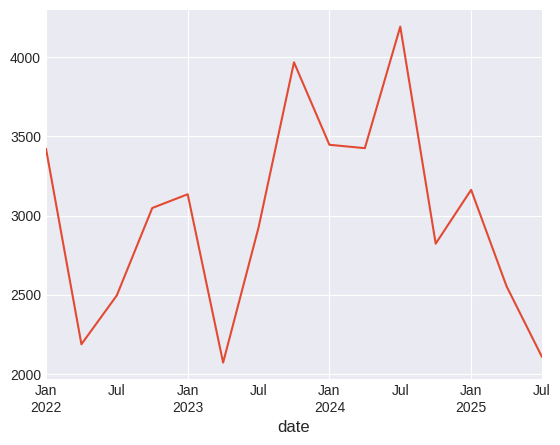

In [308]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-309-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

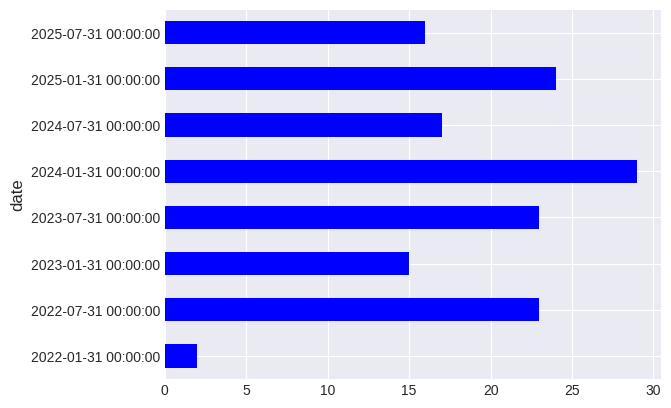

In [309]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [310]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [311]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-312-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-312-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-312-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-312-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-312-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME'

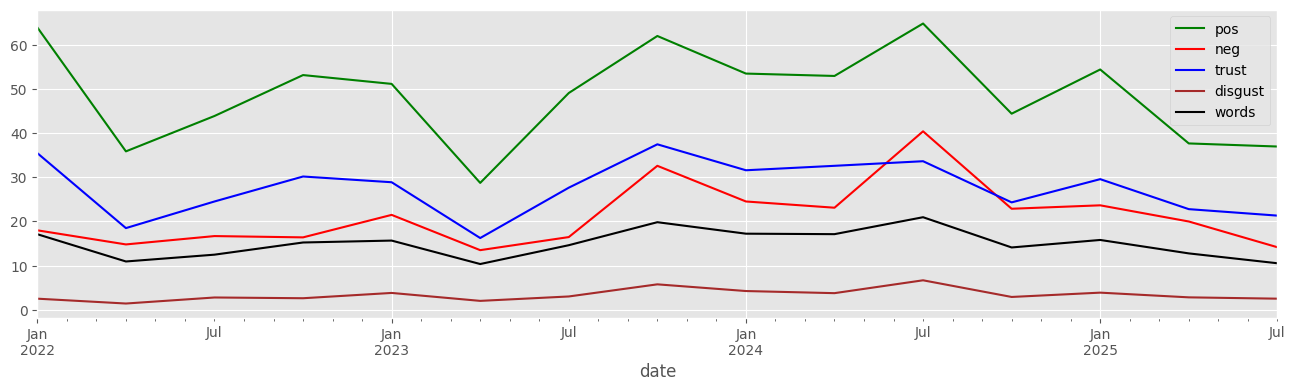

In [312]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [313]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-314-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

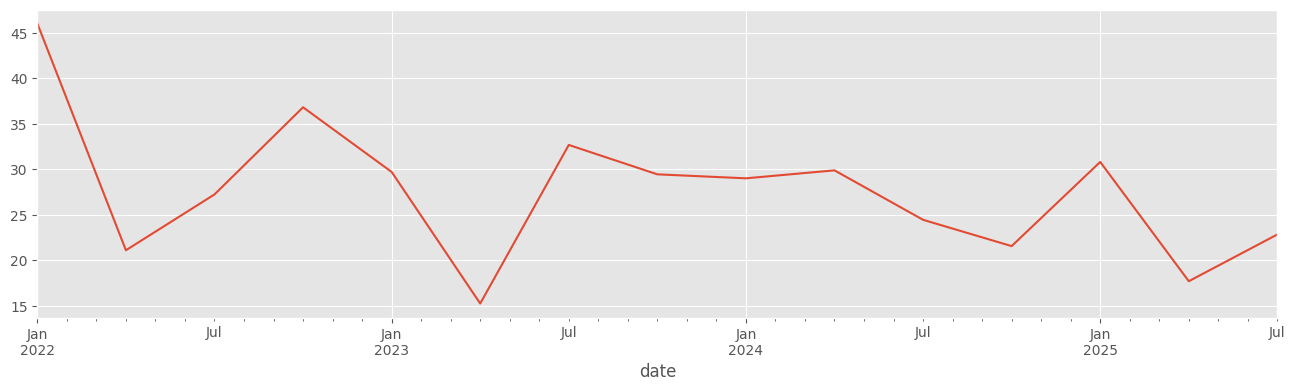

In [314]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [315]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-316-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-316-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

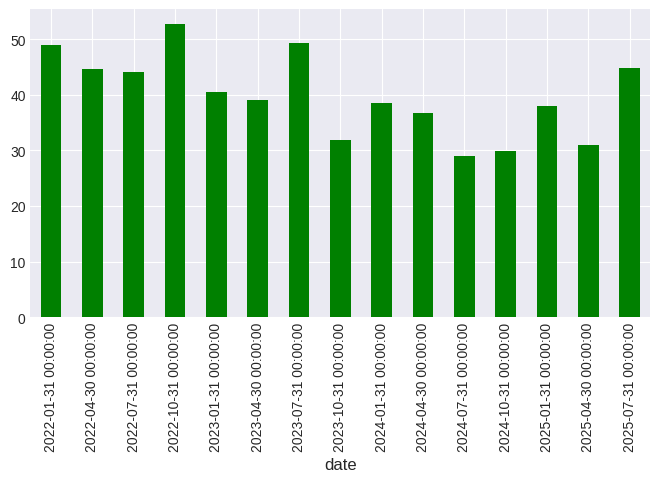

In [316]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-317-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

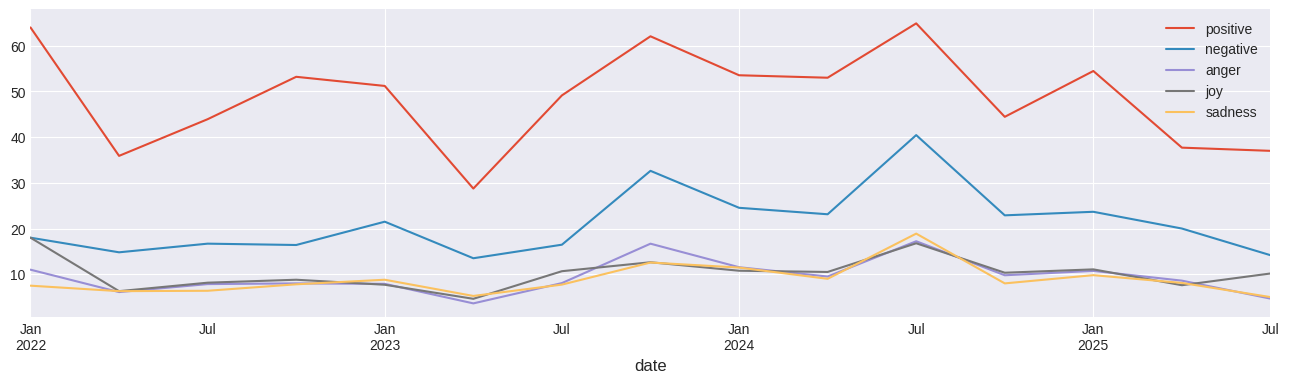

In [317]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [318]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2025-02-04        22        27                              -11
2022-05-19        16         1                               89

In [319]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

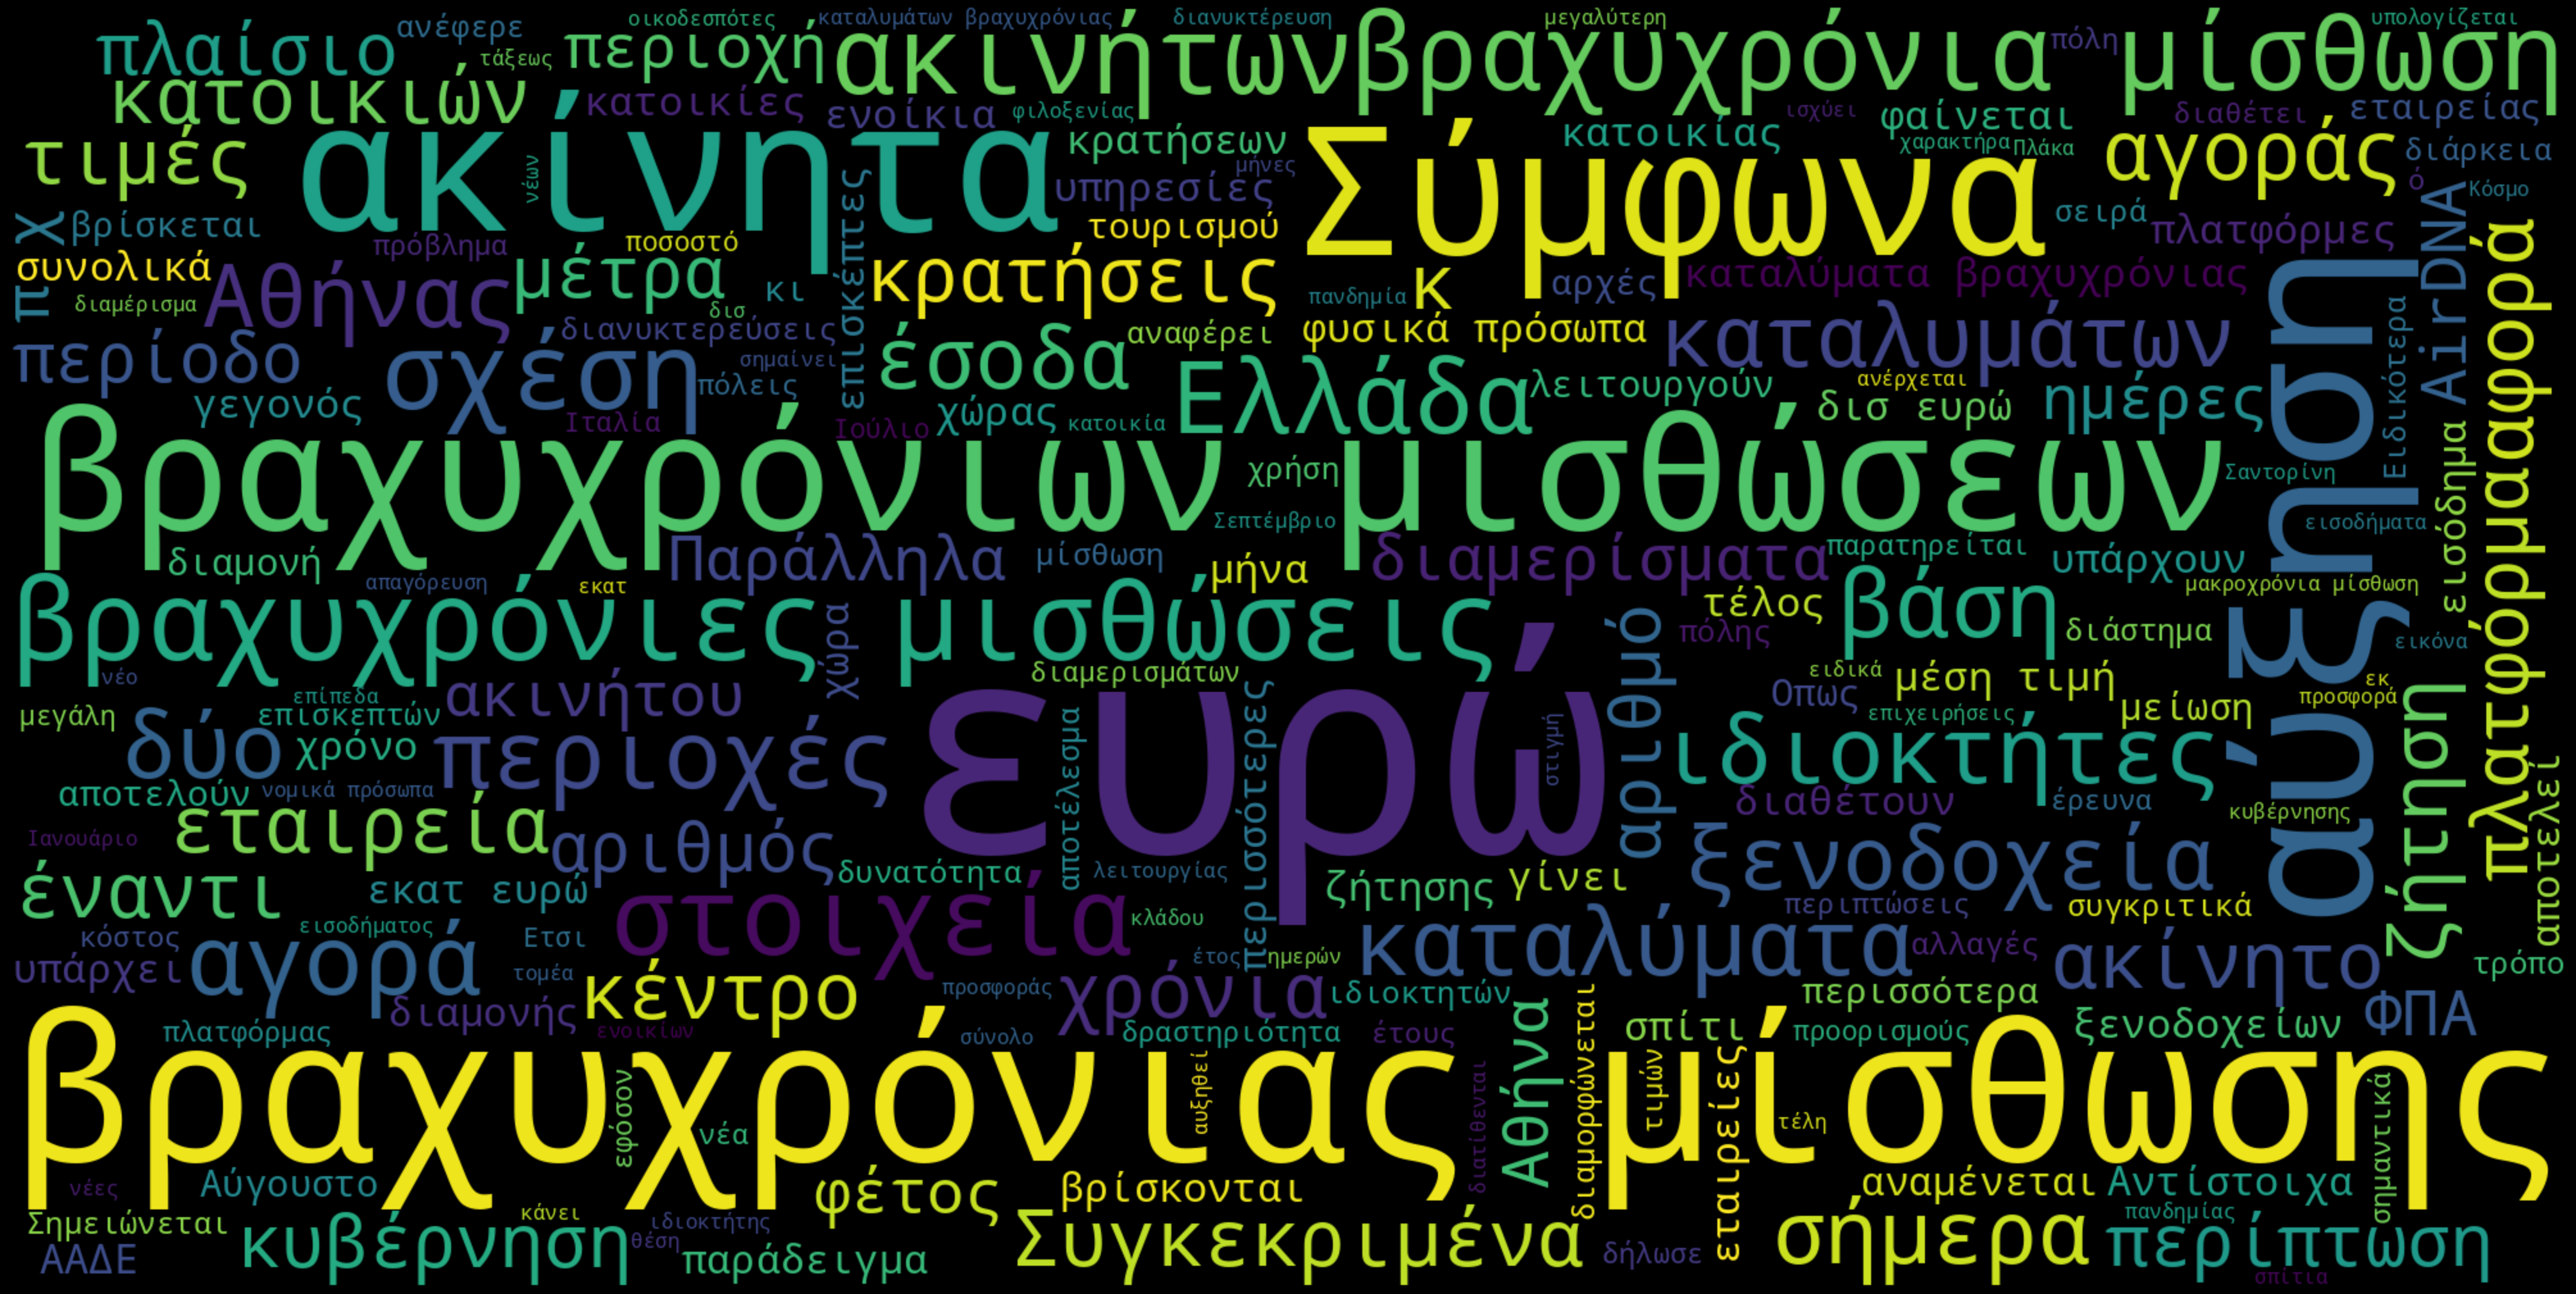

In [320]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'airbnb', 'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [321]:
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2024-10-23  100 κατοικία χώρα απορροφώ βραχυχρόνιος μίσθωσ...      7   
2024-07-08  χρόνος μπήκε ζωή εποχή γενικότερης απορρύθμιση...     26   
2023-12-02  φλωρεντία παγκόσμιος σημείο αναφορά τέχνα πολι...      8   
2023-05-03  airbnb επιστρέφει ενοικίαση δωματίο πρακτικός ...      8   
2023-04-29  περασμένος φεβρουάριο 300 κάτοικος μπόουζμαν μ...      6   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2024-10-23        31    5        0         5     26             9        8   
2024-07-08        89   25        9        27     38            54       28   
2023-12-02        56   18        2        12     30            18       10   
2023-05-03        39   11        3         4     21            15        4   
2023-04-29        34    8  

In [322]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2024-10-23  100 κατοικία χώρα απορροφώ βραχυχρόνιος μίσθωσ...      7   
2024-07-08  χρόνος μπήκε ζωή εποχή γενικότερης απορρύθμιση...     26   
2023-12-02  φλωρεντία παγκόσμιος σημείο αναφορά τέχνα πολι...      8   
2023-05-03  airbnb επιστρέφει ενοικίαση δωματίο πρακτικός ...      8   
2023-04-29  περασμένος φεβρουάριο 300 κάτοικος μπόουζμαν μ...      6   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2024-10-23        31    5        0         5     26             9        8   
2024-07-08        89   25        9        27     38            54       28   
2023-12-02        56   18        2        12     30            18       10   
2023-05-03        39   11        3         4     21            15        4   
2023-04-29        34    8        2        12     11            10        8   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2024-10-23        17     9       14                               29  
2024-07-08        68    38       21                               13  
2023-12-02        17    11       39                               53  
2023-05-03        12    12       27                               53  
2023-04-29        23    17       11                               19

In [323]:
len(filtered_df)

5

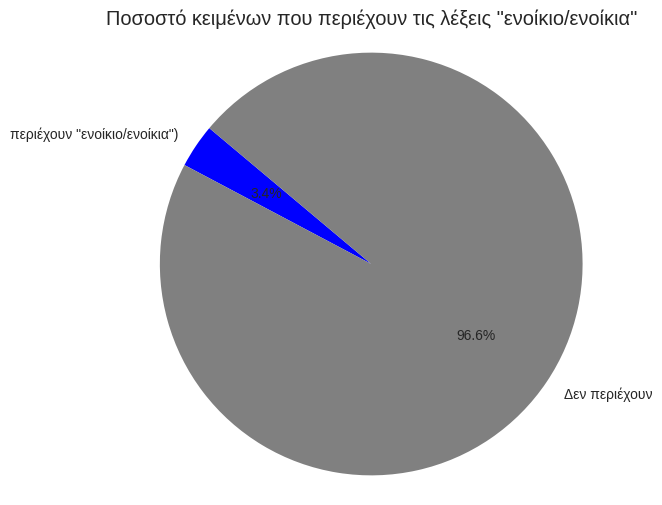

In [324]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "ενοίκιο/ενοίκια")', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "ενοίκιο/ενοίκια"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()

In [325]:
# Πάρε τις λέξεις και τις συχνότητές τους από το wordcloud
word_freq = wordcloud1.words_  # dict με μορφή {λέξη: σχετική_συχνότητα}

# Ταξινόμησέ τα σε DataFrame
top_words_df = pd.DataFrame(word_freq.items(), columns=['λέξη', 'σχετική_συχνότητα'])

# Πάρε τις 15 πιο συχνές
top_15_df = top_words_df.head(15)

# Πολλαπλασίασε με 100 (αν θες ποσοστά ή απλώς αναλογική κλίμακα)
top_15_df['σχετική_συχνότητα'] *= 100


/tmp/ipython-input-325-2951768879.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15_df['σχετική_συχνότητα'] *= 100


/tmp/ipython-input-326-767232987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='σχετική_συχνότητα', y='λέξη', data=top_15_df, palette='viridis')


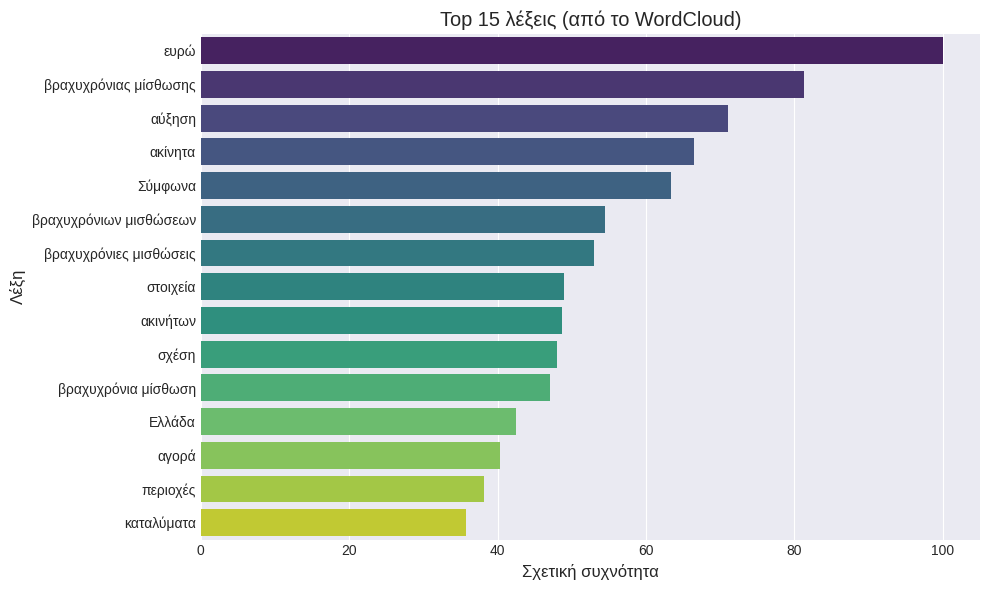

In [326]:
plt.figure(figsize=(10,6))
sns.barplot(x='σχετική_συχνότητα', y='λέξη', data=top_15_df, palette='viridis')
plt.title("Top 15 λέξεις (από το WordCloud)")
plt.xlabel("Σχετική συχνότητα")
plt.ylabel("Λέξη")
plt.tight_layout()
plt.show()
